<a href="https://colab.research.google.com/github/HanifFaishalH/MachineLearning/blob/main/JS14_2341720116_Hanif_Faishal_Hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS14 - Artificial Neural Network

Nama    : Hanif Faishal Hilmi

Kelas   : TI-3F

Absen   : 15

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lab 1
Klasifikasi Bunga Iris dengan Perceptron

### Langkah 1 - Import Library

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Langkah 2 - Load Data dan Visualisasi

### Langkah 3 - Membuat Kelas Perceptron

   0    1    2    3    4            5
0  1  5.1  3.5  1.4  0.2  Iris-setosa
1  2  4.9  3.0  1.4  0.2  Iris-setosa
2  3  4.7  3.2  1.3  0.2  Iris-setosa
3  4  4.6  3.1  1.5  0.2  Iris-setosa
4  5  5.0  3.6  1.4  0.2  Iris-setosa


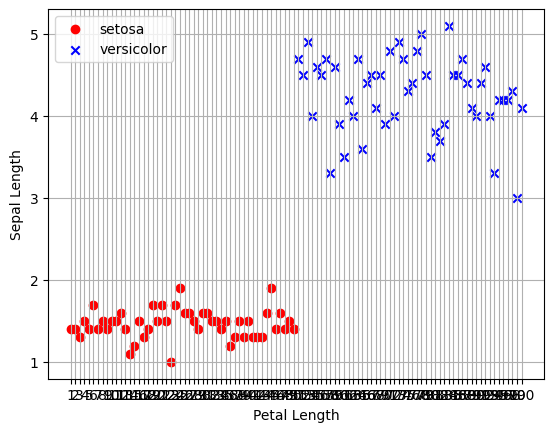

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Iris.csv', header=None)
df = df.drop(index=0).reset_index(drop=True)
# CONVERT numeric column to float
df[[1,2,3,4]] = df[[1,2,3,4]].astype(float)
print(df.head())

setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [122]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan Encoding Label

In [123]:
y = df.iloc[0:100, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [1, 3]].values

In [124]:
print(X[:10])
print(X.dtype)

print(df.dtypes)


[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]
float64
0     object
1    float64
2    float64
3    float64
4    float64
5     object
dtype: object


### Langkah 5 - Fitting Model

In [125]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai Error Per Epoch

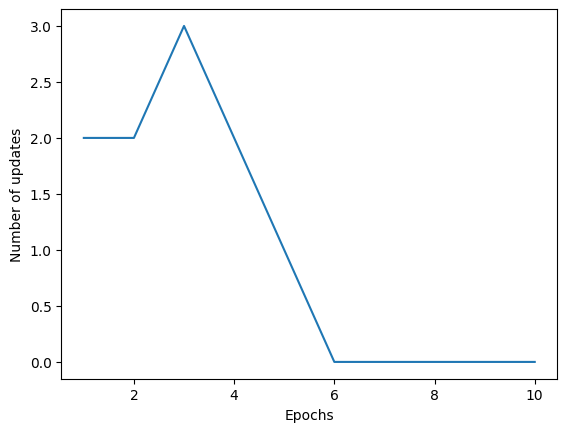

In [126]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Langkah 7 - Visualisasi Decision Boundary

/tmp/ipython-input-1222142550.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


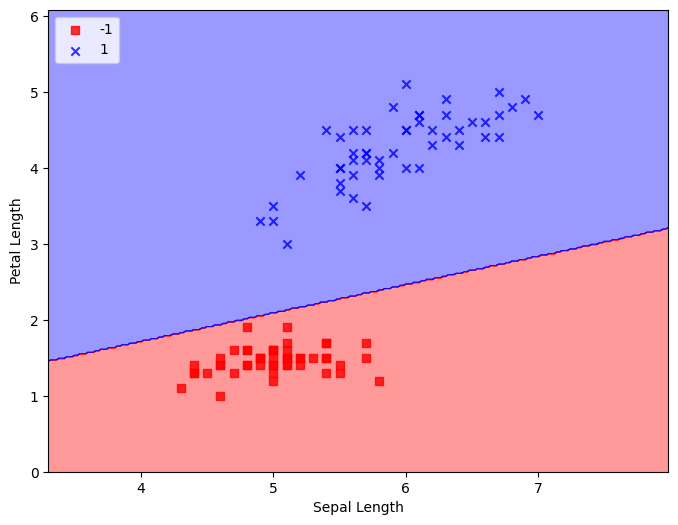

In [127]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # grid untuk decision boundary
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    # prediksi untuk contour
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # gambar decision region
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # gambar titik data
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(i),
            marker=markers[i],
            label=cl
        )

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

## Lab 2
Nilai Logika XOR dengan MLP

### Langkah 1 - Import Library

In [128]:
from sklearn.neural_network import MLPClassifier

### Langkah 2 - Buat Data

In [129]:
y = [0,1,1,0] # label
X = [[0,0], [0,1], [1,0], [1,1]] # data

### Langkah 3 - Fit Model

In [130]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2, ), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [131]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Lab 3
Klasifikasi Churn Rate dengan ANN

In [132]:
%pip install --upgrade pip
%pip install tensorflow

### Langkah 1 - Import Library

In [133]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [134]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

cek data

In [135]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# cek data
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# cek data
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Langkah 5 - Split Data

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Membuat Model ANN**

### Langkah 1 - Inisiasi Model ANN

In [140]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [141]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [142]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer



In [143]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [144]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [145]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5106 - loss: 0.6973
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8018 - loss: 0.4893
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8093 - loss: 0.4450
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8206 - loss: 0.4150
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8239 - loss: 0.3949
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8163 - loss: 0.4112
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8235 - loss: 0.3916
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8202 - loss: 0.4016
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8234 - loss: 0.3896
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8236 - loss: 0.3856
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8287 - loss: 0.3866
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### **Membuat Prediksi**

In [146]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[False]]


Iya, hasilnya false

### **Prediksi Dengan Data Testing**

In [147]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### **Cek Akurasi dan Confusion Matrix**

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1494  101]
 [ 185  220]]


0.857

## Lab 4
Klasifikasi Siang dan Malang dengan ANN

### Langkah 1 - Import Library

In [149]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

### Langkah 2 - Load Dataset

In [150]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/Machine Learning/images/training"
test_dir  = "/content/drive/MyDrive/Machine Learning/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

## Langkah 2 - Pra Pengolahan

In [151]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

### Langkah 3 - Ekstraksi Fitur

In [152]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

### Langkah 4 - Standardisasi Fitur

In [153]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

### Langkah 5 - Buat Data Latih dan Validasi

In [154]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

### Langkah 6 - Buat Model ANN

In [155]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

### Langkah 7 - Latih Model

In [156]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6190 - loss: 0.9132 - val_accuracy: 0.9792 - val_loss: 0.2744
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9792 - val_loss: 0.4963
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 2.0375e-04 - val_accuracy: 0.9792 - val_loss: 0.5509
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 3.8673e-05 - val_accuracy: 0.9792 - val_loss: 0.5835
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 2.2251e-05 - val_accuracy: 0.9792 - val_loss: 0.6057
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 1.0000 - loss: 1.2752e-05 - val_accuracy: 0.9583 - val_loss: 0.6209
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 1.6036e-05 - val_accuracy: 0.9583 - val_loss: 0.6306
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 9.6494e-06 - val_accuracy: 0

### Langkah 8 - Evaluasi Model dengan Data Test

In [157]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8998 - loss: 1.2226
Akurasi Test: 0.8999999761581421


### Langkah 9 - Buat Laporan Performansi Model

In [158]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        80
           1       0.88      0.93      0.90        80

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

[[70 10]
 [ 6 74]]


### Langkah 10 - Visualisasi Proses Training

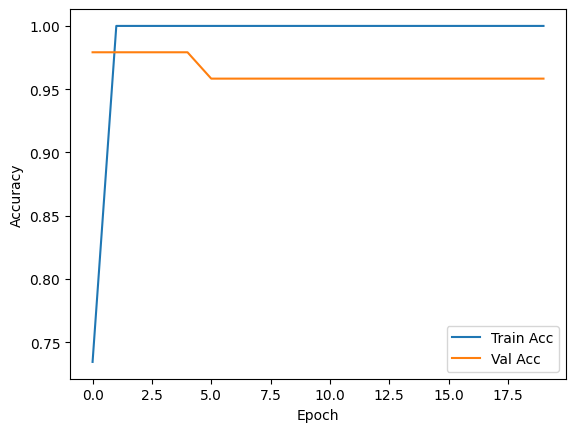

In [159]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Langkah 11 - Simpan Model

In [160]:
model.save('day_night_classifier_model.h5')

## Tugas Lab
* Lakukan klasifikasi pada data MNIST  dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktivasi
* ANN diimplementasikan dengan menggunakan tensorflow.

### Load data MNIST

In [161]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train:", x_train.shape)
print("Test :", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28)
Test : (10000, 28, 28)


### Preprocessing data

In [162]:
# normalisasi pixel
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# flatten gambar
x_train = x_train.reshape(-1, 28*28)
x_test  = x_test.reshape(-1, 28*28)

# one-hot encoding label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)


### Membangun Arsitektur ANN

In [163]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 kelas MNIST
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

### Kompilasi Model

In [165]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Train model

In [166]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8274 - loss: 0.5778 - val_accuracy: 0.9650 - val_loss: 0.1188
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9556 - loss: 0.1438 - val_accuracy: 0.9752 - val_loss: 0.0829
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9716 - loss: 0.0949 - val_accuracy: 0.9798 - val_loss: 0.0718
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9780 - loss: 0.0732 - val_accuracy: 0.9763 - val_loss: 0.0803
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9811 - loss: 0.0591 - val_accuracy: 0.9800 - val_loss: 0.0656
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9842 - loss: 0.0484 - val_accuracy: 0.9792 - val_loss: 0.0724
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9862 - loss: 0.0444 - val_accuracy: 0.9823 - val_loss: 0.0623
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9885 - loss: 0.0354 - val_ac

### Evaluasi Model

In [167]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Akurasi Test: {acc*100:.2f}%")


Akurasi Test: 98.09%


### Visualisasi akurasi dan Loss

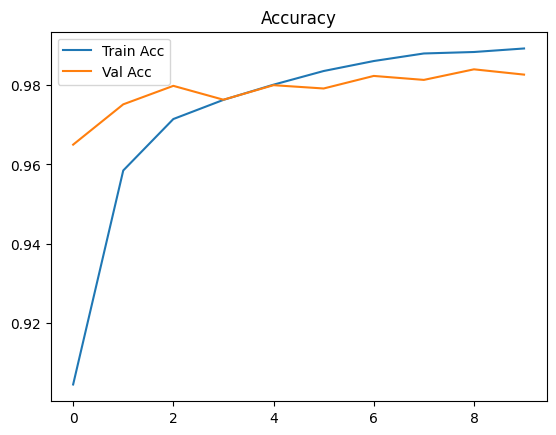

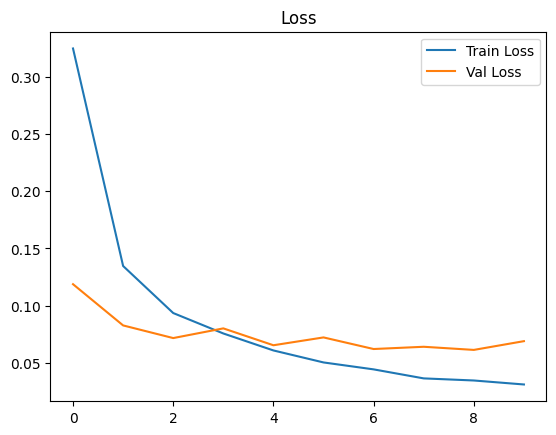

In [168]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()


### Prediksi Sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


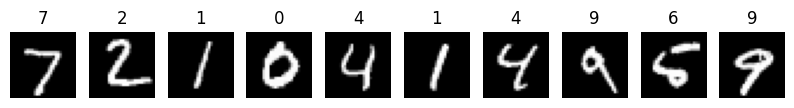

In [169]:
pred = model.predict(x_test[:10])
pred_classes = np.argmax(pred, axis=1)

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(pred_classes[i])
    plt.axis("off")
plt.show()
